# Recommended Resources
For this tutorial I recommend following along with the following:
* Week 1 & 2 of Andrew NG Machine learning course, https://www.coursera.org/learn/machine-learning
* He is an incredible teacher and will help give the intuitions necessary to excel and feel confident going forward!


# Table of Contents
* [Motivation](#motivation)
* [Overview](#overview)
* [Implementation](#implementation)
    * [Cost Function](#cost-function)
    * [Gradient Descent](#gradient-descent)
* [Problem set - Linear Regression under the hood](#problem-set-1)
    * [Linear Regression with One Variable](#linear-regression-1-variable)
    * [Linear Regression with Multiple Variables](#linear-regression-multi-variable)
* [Linear Regression With Scikit-Learn](#scikit-learn)
* [Linear Regression Project](#project)

# Key Terms
Here is a list of key terms that you can `cmd+f` to learn a bit more about. 
* training example
* parameter
* univariate
* hypothesis
* cost function
* minimization
* gradient descent
* feature normalization
* bias
* variance
* training set
* test set
* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE) 
* Residuals

# Motivation - How do we predict housing prices? <a class="anchor" id="motivation"></a>

Linear Regression is a form of supervised learning, and is used to predict a quantitative output. 

Lets start with an example. Say for instance you are tasked with helping a real estate agent predict housing prices based on the size of the house? You have a data set of the price of many houses, as well as each of their corresponding sizes. 

Lets take a look an example data set below. 

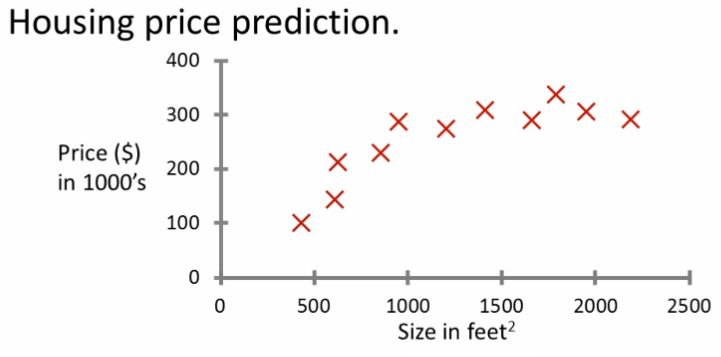

### Example problem

Based on the data above, a friend of yours has a house that is 750 square feet - how much can they expect to set it for?

There are a few approaches that could be used to solve this:
* place a straight line through the data (that predicts for a house of 750 sq feet it would sell for 150,000)
* fit a second order polynomial to the data (that may predict closer to 200,000 for the house)

Regardless of what you choose, it is import to understand the following: 

**We have a data set where the correct answer is provided!**. In other words, we know the price of each house in the data set. You can think of the price in this case as the label. This label is what classifies this as a supervised learning problem. 

The main idea here is that we can *learn* what makes the price a certain value, based on the **training data** (in this case the data provided for each house - ie size and price)

### Main Point - The algorithm (in this case linear regression) should then be able to produce more correct 'answers' (price in this case), based on *new* training data, where we do not know the price!

This type of problem is often referred to as a regression problem:
* We are predicting a continuous valued output (price) 

# Overview <a class="anchor" id="overview"></a>

What do you generally start with in a regression problem? 
* A training data set
* $m$ - the number of **training examples**. Think the number of rows or entries in the training set.
* $x's$ - the input variables (often referred to as features). Think number of columns, not including the output
* $y's$ - the output or "target" variable. Think the output column
* $(x,y)$ - a single training example, ie a house of size 1000 sq ft that sells for a price of 200,000
* $(x^i, y^i)$ - a specific training example, in this case the ith training example. i is an index to the training set

Once our training set has been defined, how do we use it?
* Take the training set and pass it into a learning algorithm
* The learning algorithm will output a *hypothesis function*, denoted $h$
* this hypothesis will take an input (size of new house) 
* And it tries to output an estimate of the value y, in this case price

## How do you represent the hypothesis?

* $h$ is going to be represented as:

$$h_\theta(x) = \theta_0 + \theta_1x$$

* What does this mean? 
    * This means that y is a linear function of x!
    * $\theta_i$ are parameters
    * $\theta_0$ is the intercept 
    * $\theta_1$ is the gradient, or slope of the line
    
This kind of a function is a linear regression with one variable. Also called **univariate linear regression**

### To Summarize:
* you have a hypothesis that takes in some variable
* Uses parameters that are determined by a learning system
* Outputs a prediction based on the input
    

# Implementation <a class="anchor" id="Implementation"></a>
## Cost Function <a class="anchor" id="cost-function"></a>

* A cost function lets us figure out how to fit the *best* straight line to our data 
* to better illustrate this, chosing different values for $\theta_i$ (parameters) gives you different functions
* Based on our training set, we want to generate parameters that make our prediction line as close to the actual output as possible!
* In other words we want our prediction, $h_\theta(x)$, to be close to y, the actual observed output
* A nice way to think of this is to imagine $h_\theta(x)$ as a 'y imitator' - it tries to convert x into y, and considering we already have y, we can evaluate how well $h_\theta(x)$ does this

### To Formalize: 
* We want to solve a **minimization problem**
* we want to minimize: 
    $$(h_\theta(x) - y)^2$$
    * i.e. minimize the difference between $h_\theta(x)$ and $y$ for each and every training example
* we then want to sum this over the entire training set: 
$$\frac 1{2m}\sum_{i=1}^m(h_\theta(x^i) - y^i)^2$$
* This can be seen in the image below, where the grey lines are the differences, and we want to minimize the sum of all of them

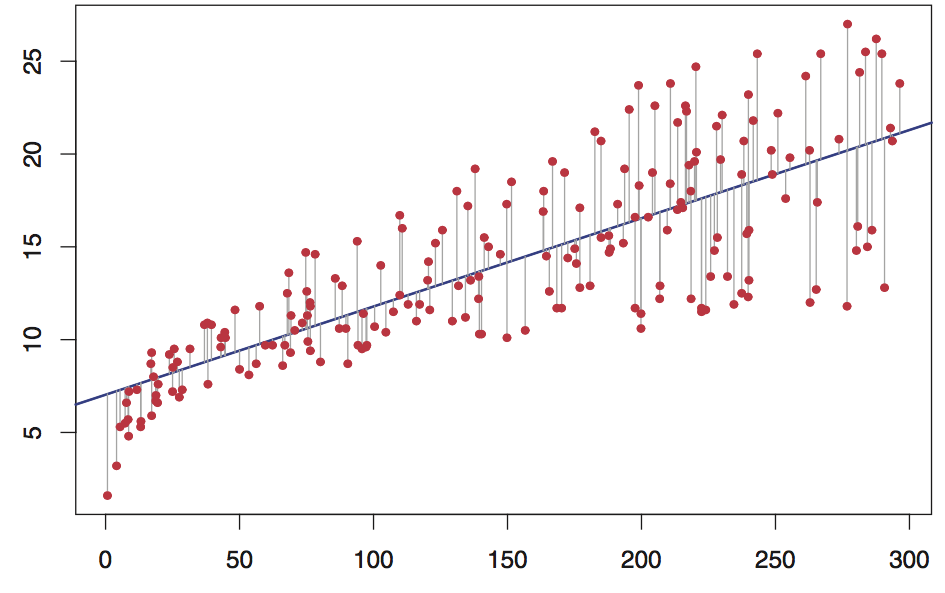
* this gives use the total squared difference between the predicted housing price, and the actual house price
* Note: the $1/2m$ makes the math a bit easier and doesn't change the constant we determine at at all (half the smallest value is still the smallest value)
* Minimizing $\theta_0$ and $\theta_1$ means we get the values of $\theta_0$ and $\theta_1$ which find, on average, the minimal deviation of x from y when we use those parameters in our hypothesis function
* this also known as the **Cost function**
$$J(\theta_0, \theta_1) = \frac 1{2m}\sum_{i=1}^m(h_\theta(x^i) - y^i)^2$$
* And we want to **minimize this cost function**, because that means we minimize the error (difference) between our prediction and the actual observed value

### Recap
* **hypothesis**: Think of this as your prediction machine - you put in an x value and get out a y value
* **cost**: a way to, using your training data, determine values for your $\theta$ values which make the hypothesis as accurate as possible

## Gradient Descent <a class="anchor" id="gradient-descent"></a>

The question remains, how do we actually minimize J, the cost function? We could just guess and try a bunch of random values for $\theta$, but that doesn't sound to promising.

* Formally, we have $J(\theta_0, \theta_1)$, and we want $min J(\theta_0, \theta_1)$
* Note: this does apply more generally, i.e.  $J(\theta_0, \theta_1...\theta_n)$

### Algorithm

The gradient descent algorithm minimizes the cost as follows:
* it starts with an initial random guess for the values of $\theta$, the parameters
* It then slowly keeps changing the values of $\theta$ to try and reduce $J(\theta_0, \theta_1)$
* each time you change the parameters, you select the gradient (direction of greatest increase/decrease, also think the greatest slope) which reduces $J(\theta_0, \theta_1)$ the most
* this occurs until you reach a local minimum
* The image below gives some intuition for what is happening 

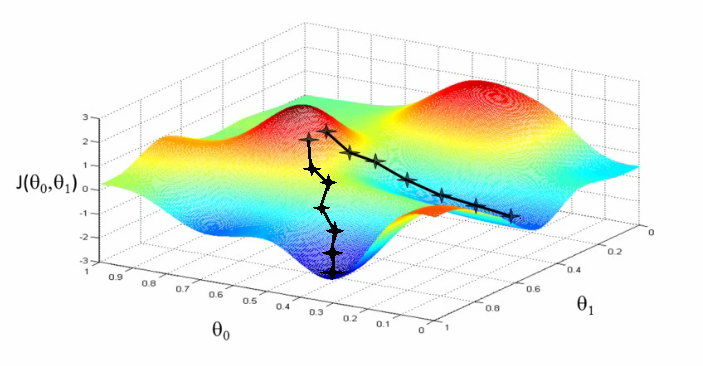

Note: you can see above that based on where the initial guess is made, that you may end up at local minimum

### Formal Definition 
* Do the following until convergence: 
$$\theta_j = \theta_j - \alpha*(\frac {\partial}{\partial\theta_j})J(\theta_0,\theta_1)$$

* In english this just means that you update $\theta_j$ by setting it to ($\theta_j$-$\alpha$) times the partial derivative of the cost function with respect to $\theta_j$
* alpha is the learning rate, and determines how large of steps you will take
    * Large alpha, aggressive gradient descent
    * Small alpha, tiny steps
* Implementation detail: we want to **simultaneously update all $\theta$** 

### Understanding the Algorithm
* What does derivative mean intuitively?
    * think how sensitive a function output is to a change in input
    * i.e. if I give x a small nudge to the right, how much does y change?
* With that intuition, a derivative says:
    * lets take the tangent at the point and look at the slope of the line 
    * so so moving towards the minimum (downwards) will create a negative derivative. 
    * alpha is always positive, so moving towards the minimum will ensure that J (error/cost) is reduced
    * Simililarly, if we decided to move in the direction of the positive gradient (opposite direction), we would be increasing J
* Note: if alpha is too large you can overshoot the the minimum and fail to converge. If alpha is too small, can take very long to converge. 
* When we reach a minimum the gradient of the tangent/derivative is 0
* when you approach the minimum, your update gets smaller because the derivative term is getting smaller (approaching 0)

# Problem set - Linear Regression under the hood <a class="anchor" id="problem-set-1"></a>
* The following walk through is based on programming exercise 1 from Andrew NG's Machine Learning course
* It will be diving under the hood of linear regression, seeing it working on real data
* The next problem set will utilize scikit learn and other librarys to see how linear regression would be used in practice

---

# Linear Regression with one Variable <a class="anchor" id="linear-regression-1-variable"></a>
In this part of the exercise, we are going to implement linear regression with one variable to predict profits for a food truck. 

Setting the stage: Imagine that you are a CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You want to use this data to help you select whcih city to expand to next!

The first step we are going to take is to simply import our data - it can be found in `ex1data1.txt`. The first column is **population of a city** and the second column is **profit of a food truck in that city**. 

## 1.1 Exploring the Data

In [621]:
# start with our imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [622]:
# and now lets actually grab our dataset using pandas, setting the correct column names
foodTruckData = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])

In [623]:
# and lets also do a bit of data inspection with the head() function
foodTruckData.head()

Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233

In [624]:
# and the describe() method
foodTruckData.describe()

Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000

#### What can we determine at this point?
* we have 97 different training examples (m = 97)
* we have one feature (n = 1) in x, which is population
* we are trying to predict the output y, profit

Now lets plot our data to get a better look at it.

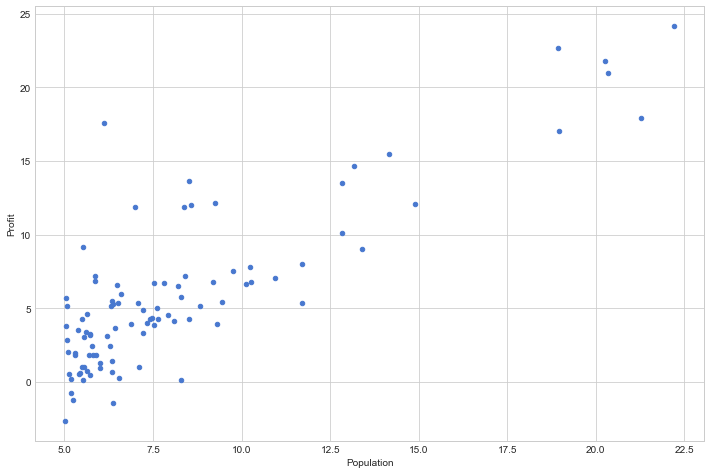

In [625]:
foodTruckData.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

#### Inferences
* It looks as though there may be a linear trend to this function 

Note: a way to think about what is going on in this exercise - we have the **"real world"** which takes in **x (population)** and will spit our **y (profit)**. We are trying to create a **model** that closely follows the **"real world"**. This created **model** will take in a new **x (population of a different city)** and try to accurately return the **profit (y)** that would result, if done in the **real world**. 

Also, when first learning this something that may be confusing is what exactly is meant when talking about parameters. The parameters to our our model are $\theta$, and they determine how it will respond to new input. $x$ is the new input.


## 1.2 Implementing Gradient Descent
Recall: The main objective of gradient descent, is to minimize the **Cost Function**
$$J(\theta_0, \theta_1) = \frac 1{2m}\sum_{i=1}^m(h_\theta(x^i) - y^i)^2$$

And in this particular case, $h_\theta(x)$ is given by the linear model:
$$h_\theta(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

Again, the parameters of the model are the $\theta_j$ values. **These are the values you want to adjust in order to minimize cost $J(\theta)$**

One common way of doing this, is to use the **batch gradient descent algorithm**.

In batch gradient descent, each iteration performs the update:
$$\theta_j = \theta_j - \alpha\frac 1m\sum_{i=1}^m(h_\theta(x^i) - y^i)x^i_j$$
This is the derivative term from the gradient conversation we had earlier. With each step of gradient descent, your parameters $\theta_j$ come closer to their optimal values that will achieve the lowest cost $J(\theta)$

### Computing the Cost
When performing gradient descent, it can be helpful to monitor for convergence by converting the cost. Lets now implement a function to compute the cost in so we can check the convergence of our gradient descent implementation. 

In [626]:
# defining our cost function
def computeCost(X, y, theta):
    
    # grab total number of training examples, m
    m = len(X)
    
    # this term is the prediction minus the actual observed value squared
    error = np.power(((X * theta.T) - y), 2)
    
    # this is summing all of the errors (think grey bars in the 2nd image in this tutorial) and multiplying by a constant
    return np.sum(error) / (2*m)

And lets add a column of ones to our training set so that our $\theta_0$ bias/intercept term can be accounted for in a vectorized implementation!

In [627]:
foodTruckData.insert(0, 'Ones', 1)
foodTruckData.head()

Ones  Population   Profit
0     1      6.1101  17.5920
1     1      5.5277   9.1302
2     1      8.5186  13.6620
3     1      7.0032  11.8540
4     1      5.8598   6.8233

And now lets initialize some of our variables

In [628]:
# set X to be our populations (training set) and y to be profits (target variable)

# getting the number of columns of our data frame
columns = foodTruckData.shape[1]

# this is similar to way you interact with vectors in matlab/octave. Here we are grabbing all of the rows
# by using the :, and then columns 0 through columns - 1, in this case 2
X = foodTruckData.iloc[:, 0:columns-1]

# and here we grab all of the rows again (training examples) and the last column 
y = foodTruckData.iloc[:, columns-1:columns]

Lets quickly check to make sure the training set (X) and the target variable (y) look correct

In [629]:
X.head()

Ones  Population
0     1      6.1101
1     1      5.5277
2     1      8.5186
3     1      7.0032
4     1      5.8598

In [630]:
y.head()

Profit
0  17.5920
1   9.1302
2  13.6620
3  11.8540
4   6.8233

Now the cost function that we defined above is looking for numpy matrices, not pandas data frames, so we will need to convert those now. We also want to intialize $\theta$ (rememeber, in this vectorized implementation $\theta$ is $\theta_0$ and $\theta_1$. Theta is generally initialized to 0.

In [631]:
# converting X and y from a pandas dataframes into a numpy arrays
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

Quickly lets look at the shape of our matrices!

In [632]:
theta

matrix([[0, 0]])

In [633]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

We can clearly see that X is a matrix with 97 rows and 2 columns, while theta is a matrix with 1 row and 2 columns, and y is a matrix with 91 rows and 1 column. **Remember:** The 97 rows correspond to the 97 training examples, m!

We are now ready to compute our cost!

In [634]:
# calling out cost function by supplying X, y, and our initial thetas
computeCost(X,y,theta)

32.072733877455676

Lets take a second to think about what just happened. 

* We fed our cost function our training data, X, along with what the correct value of y is supposed to be for each x input. 

* We also gave our cost function the intial values for $\theta$, in this case $\theta_0$ = $\theta_1$ = 0

* Our cost function calculates our **prediction**, $h_\theta(x)$, and determines how far off it was from the actual observed value at that input x. 

* This calculation of a prediction is where our **model** is being used. In this case, because both values for $\theta$ are equal to 0, our model is just: $h_\theta(x) = \theta_0 + \theta_1x_1$ = 0. In other words, we predict 0 for all of our training examples. In other words, a pretty awful first prediction!
* This **error** is then squared, and summed for all input values in the training set. 
* The summed value is multiplied by a few constants (1/2m) and we have our cost!
* So, to conclude, this 32.0727 is the cost (think error!) that is associated with setting $\theta_0$ = $\theta_1$ = 0

**Note: Two things that I found confusing when first learning this.**
* my linear algebra was slightly rusty, so I found it **very** helpful to draw out the matrices and see exactly how X * $\theta$ occured. In your head it may help to think of it as a for loop that iterates over all of the 97 training examples, and multiples each one by theta.
    * as a quick rule to remember, when multiplying matrices, the inner values must match up. 
    * in this case we must apply a transpose to theta in order for this occue
    * i.e. we need (97x2) * (2x1), seeing here that the inner values match
    * the final output will be a (97x1) matrix
    * however, if we intialized theta to be [0;0] we would have not needed to transpose!
* It was a bit confusing to me at first that all of our initial predictions would be equal to 0. You can check below though that this is most definitely the case!

For reference, the numpy array docs have some good examples that you can mess around with: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.array.html#numpy.array

And, if you are like me and your linear algebra skills need to be dusted off, check out these videos (1-4) https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab

### A few more things to be aware of:
* Remember, inner terms **must** match up
* ie a (4x3)*(3*2) matrix is allowed
* in that case, the product would be a (4x2) matrix

A few quick visuals just in case it is still foggy (take from https://www.mathsisfun.com/algebra/matrix-multiplying.html)





At the risk of talking this issue to death, here is one last way to think of what is going on in **our case**.
* We have a (97x2) matrix, X
* Each row of X, which remember is just a training example, needs to be plugged into the equation (our model) $h_\theta(x) = \theta_0x_0 + \theta_1x_1$ (I just included the bias term x_0 for clarity, it is the ones column in the X matrix)
* A very computationally efficient way to do this is to multiply X (97x2), by theta (2x1). 
* this pumps all examples of X through our model, return their predicted output ($h_\theta(x)$) for each example

In [635]:
# uncomment the below code to see the output of our predictions, X * theta.T
# X * theta.T

In [684]:
# one other example to really show what is going on here

# this is a simplified version of X, having dimensions (4x2) - remember X is (97x2)
X_simple =  np.matrix([[1,2],[3,4],[5,6],[7,8]])

# this is a simplified version of theta, having dimensions (1x2) 
theta_simple = np.matrix([10,11])

# now going to multiply X_simple by theta_simple (need to transpose theta for this to work)
# what is happening is the first row of X_simple, [1,2], is having the dot product applied via theta_simple
# this means that the first row of the output is 1*10 + 2*11 = 32. 
# this is then applied for each row
# this can be thought of as a linear transformation!
X_simple*theta_simple.T

matrix([[ 32],
        [ 74],
        [116],
        [158]])

We can see the above calculation visualized below. 

The vector on the left can be thought of a small scale version of X (X_simple from above), and the vector on the right can be though of as theta.

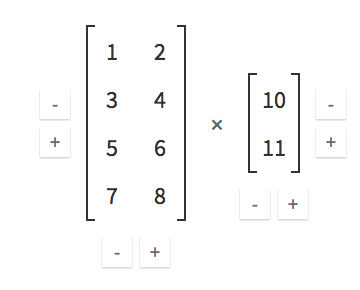
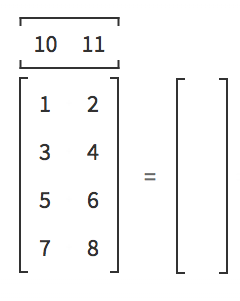
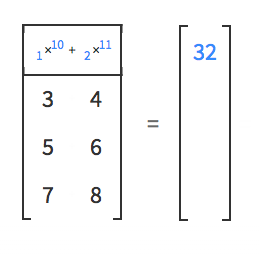
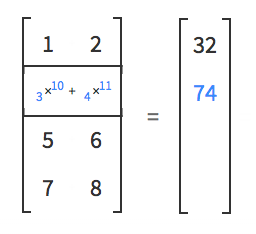
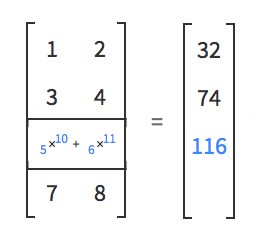
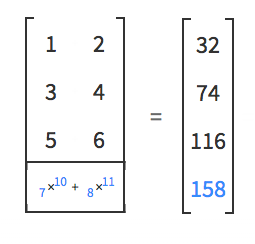
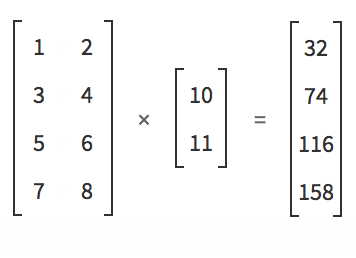

### Gradient Descent step

At this point we have the ability to compute the **cost** when given a X (a matrix of our training examples), y (a matrix of our output labels/observations), and theta (the parameters that we **chose** to be 0 initially.

As we implement this step it is crucial to keep in mind the following:
* Cost, $J(\theta)$ is parameterized by the vector $\theta$, *not* by changing X or y
* That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing X or y!

Note regarding implementation: A good way to check that this is working correctly is to make sure that the cost $J(\theta)$ is decreasing with every iteration

For reference, here is the gradient descent algorithm again:
In batch gradient descent, each iteration performs the update:
$$\theta_j = \theta_j - \alpha\frac 1m\sum_{i=1}^m(h_\theta(x^i) - y^i)x^i_j$$



In [637]:
def gradientDescent(X, y, theta, alpha, iters):
    
    # setting a temp variable that will have the same shape as theta. It will hold the theta values during each update
    temp = np.matrix(np.zeros(theta.shape))
    
    # grabbing the correct number of parameters within theta (length from theta_0 to theta_n)
    parameters = theta.shape[1]
    
    # initializing a variable to hold all of the cost values during our gradient descent process 
    # this way we can plot cost vs iterations and ensure it is descreasing over time
    costHistory = np.zeros(iters)
    
    # used so we can see how theta was calculated over time 
    thetaHistory = np.zeros([iters,theta.shape[1]])
    
    # performing gradient descent for a total of iters times in order to minimize cost
    for i in range(iters):
        
        # calculating our prediction
        prediction = X * theta.T
        
        # calculating how far off it is from the actual value of the output, in other words the erro
        error = prediction - y
        
        # determining updated theta based on gradient descent update rule
        for j in range(parameters):
            
            # multiplying the error by the X j column
            gradientTerm = np.multiply(error, X[:,j])
            
            # calculating the updated theta
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(gradientTerm))
        
        # set theta to the temp value for theta
        theta = temp 
        
        # calculate the new cost for this updated theta
        costHistory[i] = computeCost(X, y, theta)
        
        # update thetaHistory
        thetaHistory[i] = theta
    
    return theta, costHistory, thetaHistory
            

In [638]:
# set our alpha and iters values
alpha = 0.01
iters = 1000

Now we can run the gradient descent algorithm!

In [639]:
thetaFinal, cost, thetaHistory = gradientDescent(X, y, theta, alpha, iters)
thetaFinal

matrix([[-3.24140214,  1.1272942 ]])

And finally we can compute the final cost (error) of the trained model - remember it started out at 32.072

In [640]:
computeCost(X, y, thetaFinal)

4.5159555030789118

We can see that the final cost (error) is 4.5159! That is a great improvement from our random starting point. 

Lets plot the model along with the data to visually see how well of a fit it is

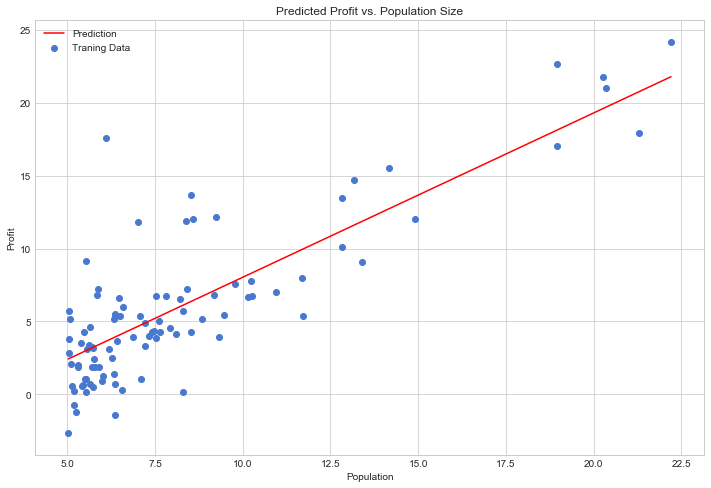

In [641]:
# this will plot the model (linear line that we generated)
x = np.linspace(foodTruckData.Population.min(), foodTruckData.Population.max(), 100)
f = thetaFinal[0,0] + (thetaFinal[0,1] * x)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')

# and this will plot the original data set
ax.scatter(foodTruckData.Population, foodTruckData.Profit, label='Traning Data')

# and finally we will add some labels and a legend
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

This looks like a pretty good fit! 

Because the gradient descent function also outputs a vector of the cost history, we can plot that against the total number of iterations to ensure that it is decreasing! 

Notice below that the cost is always decreasing

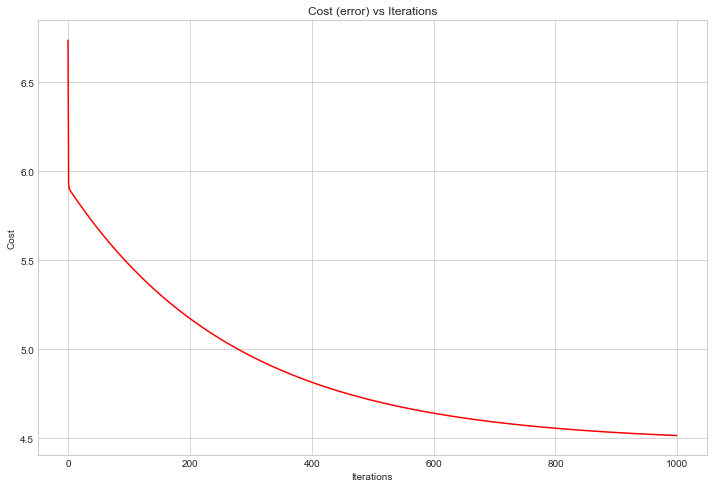

In [642]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Cost (error) vs Iterations')

Finally, we can also plot the value of $\theta_0$ and $\theta_1$ vs cost, in order to get the best visualization for what the cost function really looks like when parameterized by two variables, and trained with out X and y training set

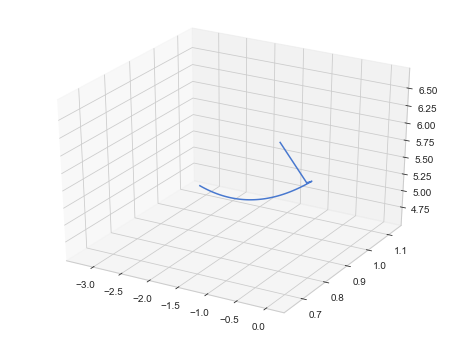

In [643]:
# lets grab our theta_0 and theta_1 and our cost
theta_0 = thetaHistory[:,0]
theta_1 = thetaHistory[:,1]

# and now lets grab out imports and plot the path that gradient descent took to minimize the cost!
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
p = ax.plot_wireframe(theta_0, theta_1, cost, rstride=4, cstride=4)
# 

---

# Linear Regression with multiple variables <a class="anchor" id="linear-regression-multi-variable"></a>


Now that we wrapped up an example of linear regression with a single variable, lets give an attempt to working with multiple variables. 

### Background:
Now suppose that you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices. 

We have a data set that contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in $ft^2$), the second column is the number of bedrooms, and the third is the price of the house.

We will start by loading the data set and displaying some values. 

In [645]:
# importing our housing data using pandas
housingData = pd.read_csv('ex1data2.txt', header=None, names=['Size', 'Number Bedrooms', 'Price'])

In [646]:
# using the head method to get an idea of what it looks like
housingData.head()

Size  Number Bedrooms   Price
0  2104                3  399900
1  1600                3  329900
2  2400                3  369000
3  1416                2  232000
4  3000                4  539900

## Feature Normalization 
When you take a look at this data set, notice that the house sizes are about 1000s times the number of bedrooms. When features differ by orders of magnitude this large, performing features scaling is necessary in order to make gradient descent converge more quickly. 

**Feature Scaling steps:**
* subtract the mean value of each feature from the data set
* Then additionally scale (divide) the feature values by their respective standard deviations
    * The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points lie within +-2 standard deviations of the mean
    
If the concept of standard deviation and variance is a bit foreign for you here are some basic definitions:

### Mean: $$\mu = \frac{\displaystyle\sum_{i=1}^{n}x_i} {n}$$
Intuitively I just think of the mean as the average over the data set.

---

### Variance: $$\sigma^2 = \frac{\displaystyle\sum_{i=1}^{n}(x_i - \mu)^2} {n}$$
Intuitively, the variance can be thought of as how far on average are the data points from the mean.

---

### Standard Deviation: $$\sigma = \sqrt{\sigma^2} = \sqrt{\frac{\displaystyle\sum_{i=1}^{n}(x_i - \mu)^2} {n}}$$
Standard deviation is just the square root of variance. So again, it is still going to give us a measure on average of how far numbers are away from the mean. If you assume that the model fits a bell curve, standard deviation can tell you some very interesting things.


### Optional Statistics investigation 
Just to get a feel for how these equations work, lets run through a quick experiment with house size to make sure we are getting the correct values.

First we can see that the means do in fact match!

In [647]:
# calculate the mean by hand
meanByHand = sum(housingData['Size'])/len(housingData['Size'])
meanByHand

2000.6808510638298

In [648]:
# calculating the mean using np mean() function 
housingData['Size'].mean()

2000.6808510638298

Here we can see that the standard deviation is off at first

In [649]:
# calculate the standard deviation by hand
stdByHand = np.sqrt(sum((abs(housingData['Size'] - meanByHand)**2))/len(housingData['Size']))
stdByHand

786.20261874304674

In [650]:
# and now using a np std() function
housingData['Size'].std()

794.70235353388966

Why is this the case? Well the numpy function np.std takes an optional parameter of `ddof`: Delta Degrees of Freedom. 

This is set to 1 by default. If we set it to 0, we will get the same result as our hand calculation.

In [651]:
# this is now equal to our stdByHand
housingData['Size'].std(ddof=0)

786.20261874304674

Lets add a little more context. In the calculation of variance, (rememeber, the standard deviation is the square root of variance), we typically divide by the number of values that we have. 

But, if we select a random sample of N elements from a larger distribution and calculate variance, division by N can lead to an underestimate of the actual variance. 

To fix this, we can lower the number we divide by (**the degrees of freedom**) to a number less than N (usually N-1). The `ddof` parameter allows us to change the the divisor N by the amount we specify. 

The default of the numpy std() function to set `ddof` = 1 is to correct the bias for sample variance by dividing by `N - 1` instead of N. This is likely to be what we want, since we are using the function on a random sample of a larger distribution.

We can now see that our hand calculation will equal the original np std() output if we divide by `N-1`

In [652]:
# now divide by N -1 
stdByHand = np.sqrt(sum(((housingData['Size'] - meanByHand)**2))/(len(housingData['Size'])-1))
stdByHand

794.70235353388966

And finally, lets check to make sure a hand calculation of variance is equal to the numpy equivalent

In [653]:
# calculate variance by hand
varianceByHand = sum((housingData['Size'] - meanByHand)**2)/len(housingData['Size'])
varianceByHand

618114.55771842459

In [654]:
# calculate variance using np var() function 
housingData['Size'].var()

631551.8307123034

Again, we run into a minor difference just as we did with standard deviation. But lets divide by `N-1` again in our hand calculation to prove that by changing the degrees of freedom we get equivalent answer. You can see they are now equivalent. 

In [655]:
# now divide by N - 1
varianceByHand = sum((housingData['Size'] - meanByHand)**2)/(len(housingData['Size'])-1)
varianceByHand

631551.8307123034

### Optional further investigation

Note: more information on degrees of freedom in statistics can be found here: https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics)

### A quick synopsis: 

The number of independent ways by which a dynamic system can move, without violating any constraint imposed on it, is called number of degrees of freedom. In other words, the number of degrees of freedom can be defined as the minimum number of independent coordinates that can specify the position of the system completely.

Estimates of statistical parameters can be based upon different amounts of information or data. The number of independent pieces of information that go into the estimate of a parameter are called the degrees of freedom. In general, the degrees of freedom of an estimate of a parameter are equal to the number of independent scores that go into the estimate minus the number of parameters used as intermediate steps in the estimation of the parameter itself (e.g. the sample variance has N − 1 degrees of freedom, since it is computed from N random scores minus the only 1 parameter estimated as intermediate step, which is the sample mean).

### And for more intuition:
**First, forget about statistics.** Imagine you’re a fun-loving person who loves to wear hats. You couldn't care less what a degree of freedom is. You believe that variety is the spice of life.

Unfortunately, you have constraints. You have only 7 hats. Yet you want to wear a different hat every day of the week.

On the first day, you can wear any of the 7 hats. On the second day, you can choose from the 6 remaining hats, on day 3 you can choose from 5 hats, and so on.

When day 6 rolls around, you still have a choice between 2 hats that you haven’t worn yet that week. But after you choose your hat for day 6, you have no choice for the hat that you wear on Day 7. You must wear the one remaining hat. You had 7-1 = 6 days of “hat” freedom—in which the hat you wore could vary!

**That’s kind of the idea behind degrees of freedom in statistics**. Degrees of freedom are often broadly defined as the number of "observations" (pieces of information) in the data that are free to vary when estimating statistical parameters.

#### Now imagine you're not into hats. You're into data analysis.

You have a data set with 10 values. If you’re not estimating anything, each value can take on any number, right? Each value is completely free to vary.

But suppose you want to test the population mean with a sample of 10 values, using a 1-sample t test. You now have a constraint—the estimation of the mean. What is that constraint, exactly? By definition of the mean, the following relationship must hold: The sum of all values in the data must equal n x mean, where n is the number of values in the data set.

So if a data set has 10 values, the sum of the 10 values must equal the mean x 10. If the mean of the 10 values is 3.5 (you could pick any number), this constraint requires that the sum of the 10 values must equal 10 x 3.5 = 35.

With that constraint, the first value in the data set is free to vary. Whatever value it is, it’s still possible for the sum of all 10 numbers to have a value of 35. The second value is also free to vary, because whatever value you choose, it still allows for the possibility that the sum of all the values is 35.

In fact, the first 9 values could be anything, including these two examples:

34, -8.3, -37, -92, -1, 0, 1, -22, 99
0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9

But to have all 10 values sum to 35, and have a mean of 3.5, the 10th value cannot vary. It must be a specific number:

34, -8.3, -37, -92, -1, 0, 1, -22, 99  -----> 10TH value must be 61.3
0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ----> 10TH value must be 30.5

Therefore, you have 10 - 1 = 9 degrees of freedom. It doesn’t matter what sample size you use, or what mean value you use—the last value in the sample is not free to vary. You end up with n - 1 degrees of freedom, where n is the sample size.

Another way to say this is that the number of degrees of freedom equals the number of "observations" minus the number of required relations among the observations (e.g., the number of parameter estimates). For a 1-sample t-test, one degree of freedom is spent estimating the mean, and the remaining n - 1 degrees of freedom estimate variability.

### Back to Linear Regression...

Okay, now that we have dug into some of the underlying principles behind the mean, std, and variance, we can get back to actually performing our feature scaling! We will use the numpy function for simplicity.

Remember, to perform feature scaling we first subtract the mean and then divide by the standard deviation

In [656]:
# performing feature normalization
housingData = (housingData - housingData.mean()) / housingData.std()
housingData.head()

Size  Number Bedrooms     Price
0  0.130010        -0.223675  0.475747
1 -0.504190        -0.223675 -0.084074
2  0.502476        -0.223675  0.228626
3 -0.735723        -1.537767 -0.867025
4  1.257476         1.090417  1.595389

Great, now that that is complete, lets go through our first pre processing step from part 1 (linear regression with a single variable)!

First, lets add a column of ones to our training set so that our $\theta_0$ bias/intercept term can be accounted for in a vectorized implementation!

In [657]:
housingData.insert(0, 'Ones', 1)
housingData.head()

Ones      Size  Number Bedrooms     Price
0     1  0.130010        -0.223675  0.475747
1     1 -0.504190        -0.223675 -0.084074
2     1  0.502476        -0.223675  0.228626
3     1 -0.735723        -1.537767 -0.867025
4     1  1.257476         1.090417  1.595389

And again, lets initialize some of our variables. For this entire problem we will append a 2 to each variable to differentiate it from the first example.

In [683]:
# set X2 to be our house size and number of bedrooms (training set) and y to be profits (target variable)

# getting the number of columns of our data frame
columns = housingData.shape[1]

# Here we are again grabbing all of the rows by using the :, and then columns 0 through columns - 1,
# in this case 3
X2 = housingData.iloc[:, 0:columns-1]

# and here we grab all of the rows again (training examples) and the last column 
y2 = housingData.iloc[:, columns-1:columns]

As always lets take a quick look at our data to make sure we grabbed everything correctly

In [659]:
X2.head()

Ones      Size  Number Bedrooms
0     1  0.130010        -0.223675
1     1 -0.504190        -0.223675
2     1  0.502476        -0.223675
3     1 -0.735723        -1.537767
4     1  1.257476         1.090417

In [660]:
y2.head()

Price
0  0.475747
1 -0.084074
2  0.228626
3 -0.867025
4  1.595389

Perfect, everything is looking good. We can now take the next step and implement **Gradient Descent**.

## Gradient Descent implementation

You may be wondering, has our original hypothesis changed now that we are working with multiple variables?

Recall, we originally we had the following system:

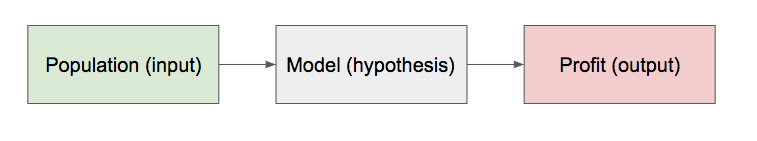

With a hypothesis of the form:

$$h_\theta(x) = \theta_0 + \theta_1x$$

And now our system looks like:

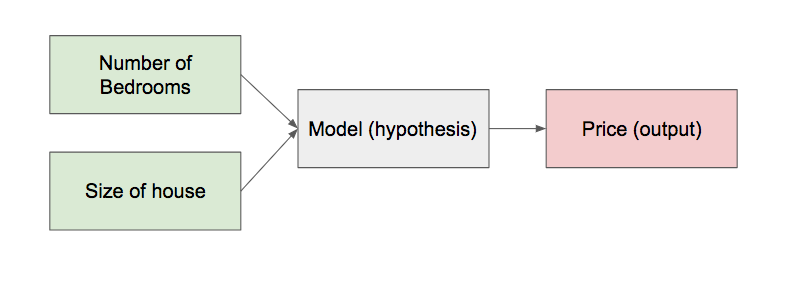

With the addition of a second input variable (an additional feature for which linear regression can learn from), our hypothesis is updated to the form:

$$h_\theta(x) = \theta_0 + \theta_1x_1 + \theta_2x_2$$

Does this mean that we need to change our cost and gradient descent functions we defined earlier? No! This is because we implemented a vectorized routine that can hand additional features.

Originally, our feature vector $X$ had two columns $x_0$ and $x_1$. Now, our feature vector has expanded to 3 columns, $x_0$, $x_1$ and $x_2$. 

We simply need our parameters vector, $\theta$, to expand as well - in this case have it be a (1x3) matrix

### Intuition

At this point it may become slightly foggy as to what intuitions you should have about $h_\theta(x)$. Here is a good way to think about it:
* $\theta_0$ represents the **basic price of a house**
* $\theta_1$ represents the **price per square meter**
* $\theta_2$ represents the **price per floor**
* $x_1$ is the **number of square meters in the house**
* $x_2$ is the **number of floors in the house**

Hence, plugging in a training example to our hypothesis, which sums up all of the terms, we get a predicted price for the house!


So, because of our vectorized implementation we are now ready to convert our training data to matrices, initialize theta, and perform linear regression on the training set by using the gradient descent algorithm!

In [661]:
# convert training data to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression using gradient descent on the training set
thetaFinal2, cost2, thetaHistory2 = gradientDescent(X2, y2, theta2, alpha, iters)

computeCost(X2, y2, thetaFinal2)

0.13070336960771892

With everything that is going on I think that it is very helpful to reiterate on what we are actually solving for- the values for $\theta$!

Here are the parameter values that gradient descent ended up finding for us:

In [662]:
thetaFinal2

matrix([[ -1.10797896e-16,   8.78503652e-01,  -4.69166570e-02]])

In other words, $\theta_0$= -1.1079e-16, $\theta_1$= 8.785e-01, and $\theta_2$=-4.6916e-02

Which means our normalized hypothesis turns out to be:
$$h_\theta(x) = -1.1079*10^{-16} + 8.785*10^{-1}x_1 + -4.6916*10^{-2}x_2$$

What is this used for? To make a prediction on a new house! Unfortunately we don't have any test data to work with, but we can run through a training example just to see how the model works! (note this will lead to high bias and is just done to show the mechanics of the model)

In [663]:
# lets start by picking out an example from our original housing prices 
housingDataOriginal = pd.read_csv('ex1data2.txt', header=None, names=['Size', 'Number Bedrooms', 'Price'])
housingDataOriginal.head()

Size  Number Bedrooms   Price
0  2104                3  399900
1  1600                3  329900
2  2400                3  369000
3  1416                2  232000
4  3000                4  539900

Lets take the example at index 4. It has as size of 3000 ft squared, 4 bedrooms, and a price of $539,990. We will multiply our normalized feature vector for that example, times our final theta values that gradient descent calculated.

In [664]:
# calculating our prediction for the training example at index 4
X2[4] * thetaFinal2.T

matrix([[ 1.05353857]])

This is our normalized prediction (output for y)! We now need to denormalize it in order to determine our actual prediction in units of dollars ($)

In [665]:
# get the standard deviation value for price (this was used to normalize price in our preprocessing step)
originalPriceSTD = housingDataOriginal['Price'].std()
originalPriceSTD

125039.89958640099

In [666]:
# get the mean value for price (this was also used to normalize price in our preprocessing step)
originalPriceMean = housingDataOriginal['Price'].mean()
originalPriceMean

340412.6595744681

In [667]:
# denormalize our predicted price to see if our model is behaving at least somewhat correctly
predict = (X2[4] * thetaFinal2.T) * originalPriceSTD + originalPriceMean
predict

matrix([[ 472147.01700025]])

We can see here that our prediciton was \$472147 and the actual value was \$539900. This obviously is not totally accurate. Why?

#### Well there are a few things that most likely come into play here. 
* First off, this model most likely suffers from **high Bias**. That essentially means that there is a large bias in this model that the relationship is linear, when in fact it may not be. You can think of the model as being too simple (see image below)
* Second, this model only utilizes 2 features. Price is most likely based on a much larger set of features than 2, and because the model was only able to learn from 2, error is going to be introduced

### Bias vs Variance

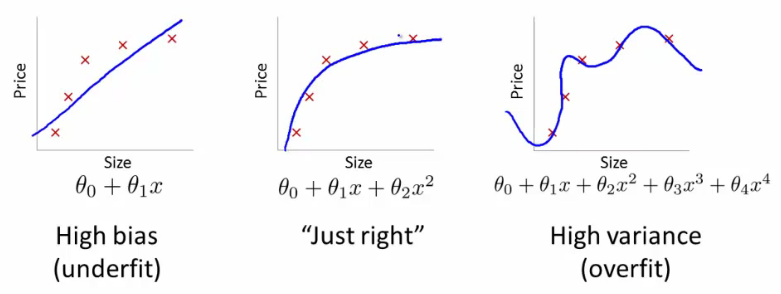

#### What can be done in this case to fix the error?
When you run into a situation like this there is a general set of guidelines I like to follow to reduce the error:
* **Get more training Data**
    * this mainly helps to fix high variance (overfitting)
    * however, it is not good in the case of high bias, which is what we are most likely dealing with here
* **Try a smaller set of features**
    * fixes high variance (overfitting), but again does not help if you have high bias (underfitting)
* **Try getting additional features**
    * fixes high bias, so we would want to try that here
    * it makes the model/hypothesis more specific/complex, capturing more about the problem at hand)
* **Adding polynomial features**
    * fixes high bias as well
* **Try add regularization (will talk about more in later notebook)**
    * decrease regularization: fixes high bias
    * increase regularization: fixes high variances

### Make sure cost is always decreasing
Finally, with all of that high level conversation out of the way, we can quickly make sure our cost was always decreasing during our gradient descent

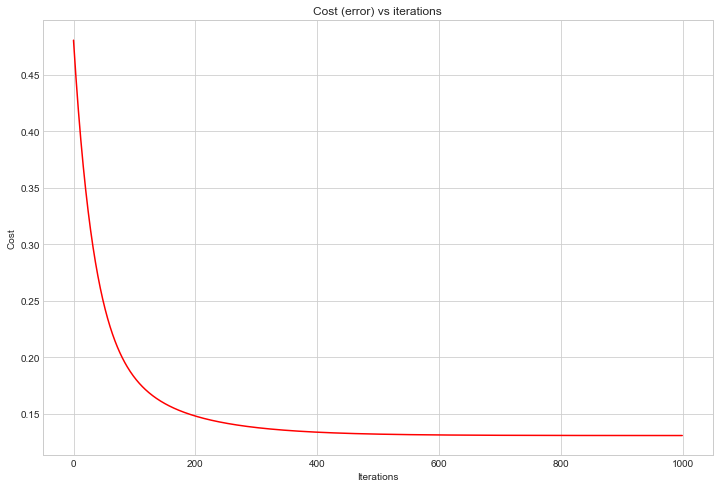

In [668]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Cost (error) vs iterations')

---

# Linear Regression with Scikit-Learn <a class="anchor" id="scikit-learn"></a>
Now that we finished the assignment from Andrew NG's course and have gone under the hood to look at how Linear Regression with Gradient Descent works mechanically, lets take a minute to reimplement them with Scikit-learn's Linear Regression Algorithm, and see what it comes up with!

For now don't focus too much on the the syntax, we will dive into a real world problem and go over all of the components of the packaged approach next.

In [669]:
from sklearn import linear_model
linearRegressionModel = linear_model.LinearRegression()
linearRegressionModel.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

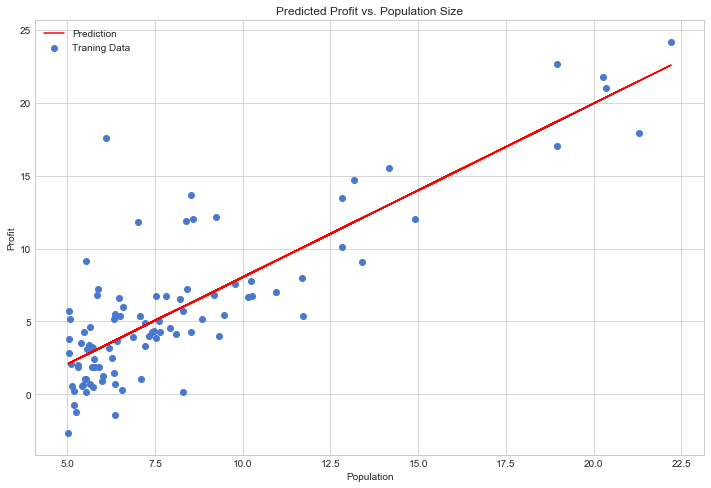

In [670]:
x = np.array(X[:,1].A1)
f = linearRegressionModel.predict(X)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(foodTruckData.Population, foodTruckData.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

### What a great fit!
We can see clearly that our model we built from scratch using gradient descent fit extremely well!

---

# Linear Regression Project <a class="anchor" id="project"></a>
So far we have gone over some of the following examples:
* **Linear Regression with a single variable, from scratch**
* **Linear Regression with multiple variables, from scratch**
* **Linear Regression scikit-learn (just a quick comparison)**

Lets now take on a real world contract project and see how what we have learned so far can be implemented in practice!

#### Background:
Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

### What should we focus on?
Any time you are faced with a broad open ended problem such as this, its important to clarify exactly what you are trying to accomplish!

In this case it is: 

# Main Goal: 

**Determine whether company should focus their efforts on their mobile app experience, or their website**

Now that we have that settled, lets start by doing first grabbing the data.

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

Lets start by reading in the Ecommerce Customers csv file as a DataFrame, utilizing pandas.

In [671]:
customerInfo = pd.read_csv('Ecommerce Customers')

## Explore the Data
It may be appealing to just jump right into trying to utilize scikit learn, but that would be a poor decision. We always want to explore the data before we start trying to fit models!

The following is a pretty nice process to utilize.

In [672]:
customerInfo.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

We can see from the head method that the csv the company provided us with has 8 columns. For the purposes of this project (and linear regression in general) we won't focus on email, address, or avatar, since they are strings and we are going to be most focused on quantitative features. 

Next lets take a quick look at the data set using the info() and describe() methods.

In [673]:
customerInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [674]:
customerInfo.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

What can we gather from the above outputs?
* we have 500 training examples (m = 500) to work with
* remember, each row is 1 training examples
* We have **4 input features**
    * **Avg. Session Length**
    * **Time on App**
    * **Time on Website**
    * **Length of Membership**
    
* and we have **1 output feature**
    * **Yearly Amount Spent**

## Exploratory Data Analyis
**Lets continue to explore the data!**

Note: at this point we will only be using the numberical data from this csv. At some point we may use natural language processing (NLP) to being using the other data as well.

That leads to an important question: how to we being an exploratory data analyis?

Without going too far into the statistical side of things (if you are interested in that check out my notebook **Linear Regression Walk Through - from a statistical perspective**), we are going to use seaborn. It has the ability to create some pretty nice plots that can aid greatly in initial analysis.

First, lets see what type of relationship there is between the time a user spends on the website and the amount they sped in a single year.

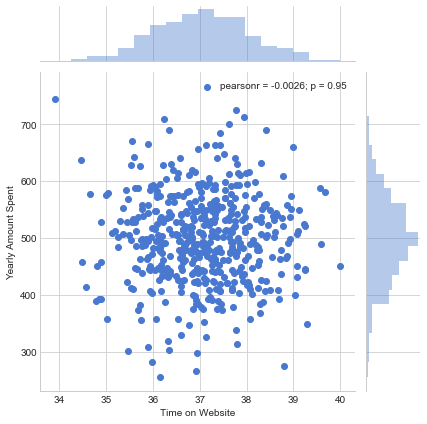

In [675]:
import seaborn as sns

# Creating a jointplot with Seaborn - Trying to compare the time a user spends on the website to 
# the amount they spend in a single year

sns.set_palette('muted')
sns.set_style('whitegrid')
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customerInfo)

#### Does this correlation make sense?  
There doesn't appear to be a large trend just based on this plot.

#### Statistical side note
You can see that there are two values provided by seaborn on the plot, the pearsonr and p value.

#### 1) pearsonr 
Is the measure of the correlation of the linear relationship of two variables. Here it is -0.0026, which is a slightly negative correlation.

#### 2) p value 
Without going into detail, if we see a small p-value, then we can infer that there is an association between the predictor and the response. Typical p-values that indicate there is an association between the predictor and response are less than 0.05. Since our value is 0.95 we can determine there is not association.

Okay, now lets do the same thing but with the time on app column instead.

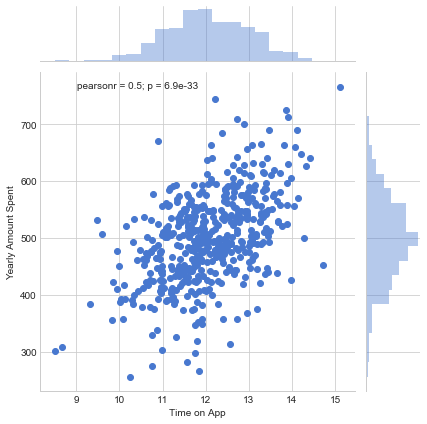

In [676]:
sns.jointplot(data=customerInfo, x='Time on App', y='Yearly Amount Spent')

* here we can see that there is a slightly stronger positive linear correlation, since the pearsonr value is 0.5
* Also, based on the p-value (much less than 0.05), we can determine there is an association between the time a user spends on the app, and the yearly amount they spend.

Now lets create a 2d hexbin plot to look further into time on app and yearly amount spent (here it is very similar to the plots above, however, now the main difference is that the points are grouped into hex bins and the more that are in the hex bin the darker the hexagon). Notice that the pvalue has increased an the pearsonr value has gone down.

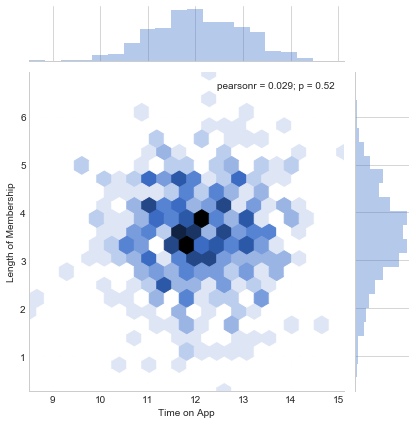

In [677]:
sns.jointplot(data=customerInfo, x='Time on App', y='Length of Membership', kind='hex')

Finally lets explore these relationships across the entire data set. 

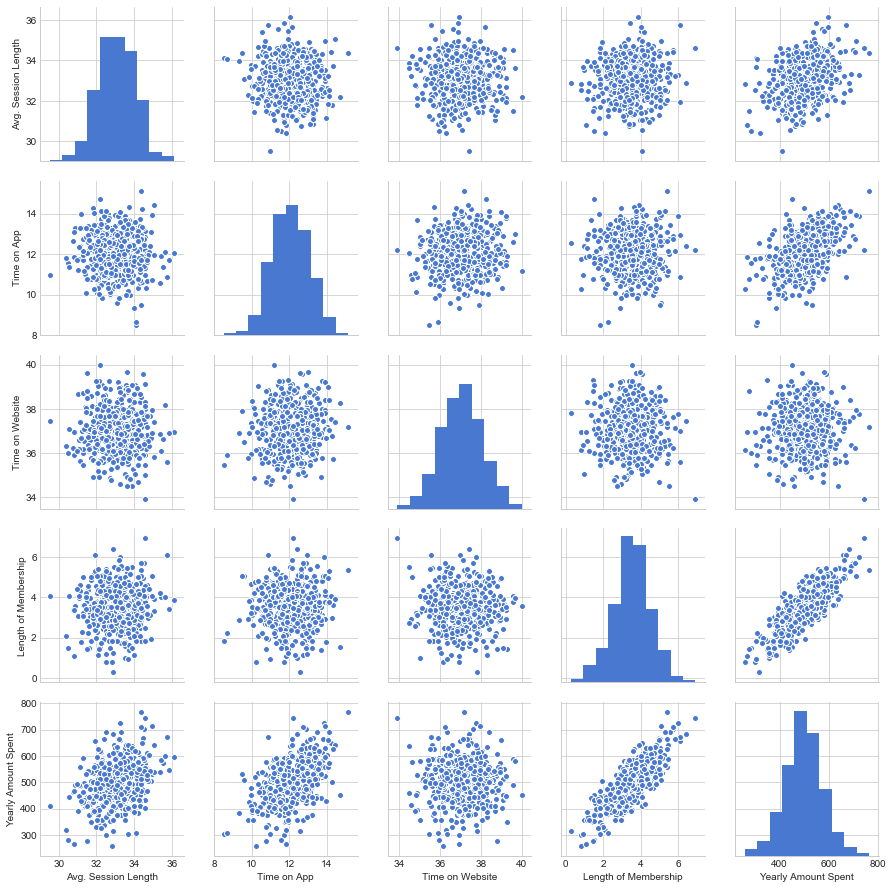

In [678]:
sns.pairplot(customerInfo)

### Based on this this plot, what feature seems to be the most correlated with yearly amount spent?
Well we can see that it is clearly length of membership.

Lets create a linear model (using seaborns lmplot) of Yearly Amount Spent vs. Length of Membership.

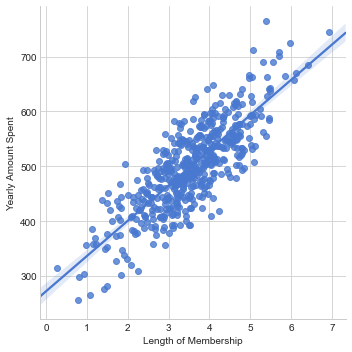

In [679]:
sns.lmplot(data=customerInfo, y='Yearly Amount Spent', x='Length of Membership')

You can see from the output that there is very little error here (As seen by the shaded regions, the error bars). This indicates that it is a good linear fit! It also gives a good idea that the longer you stay a member, the more you will spend per year!

## Training and Testing Data

We have now explored the data and have a decent idea of what is important with it, so can look into the training and testing of the model!

The first step to doing that is grabbing our input features (X), and our output (y), and then splitting the data into training and testing sets.

Remember: The idea behind everything we are doing in this walk through is that in the real world certain relationships can be modeled. Yearly amount spent by a user can be modeled as a function of many different features. The ones that we are going to use to create a model that we can then use to predict Yearly amount spent, are Avg. Session Length, Time on App, Time on Website, Length of Membership.

In [680]:
customerInfo.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [689]:
# setting the y (output) and x (input)
y = customerInfo[['Yearly Amount Spent']]
X = customerInfo[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

### Split the data into a training and testing set
We haven't dug in too much yet to training and testing data (more can be seen in some of my other notebooks), but the general idea is as follows:

**We train our model on training data**. This is very important to understand. Under the hood, when using a library like scikit learn, the learning process is still happening. The parameters are learned over the course of many iterations of gradient descent. How are they learned? **Based off of our training data**! If we change our training data, we will create a new model with different parameters, that will consequently lead to different hypothesis. 

#### What happens when we supply new data? 
One of the main things we are trying to accomplish is the ability to **accurately predict new training examples that we have not seen before**. The model that we generate based off of the training data, learned its values based on the training data! This means that if we try to test the models accuracy by feeding it the same data it was used to train on, the over all error (cost) will most likely be much lower than if we supplied it new, unseen test data.

What can often happen is that a model which is more complex will overfit the training data, leading to high variance. In this case the training error can be very low (sometimes less than 1%)! However, the high variance in the model will lead to a very high test error. The plot below gives a good idea of what this looks like.

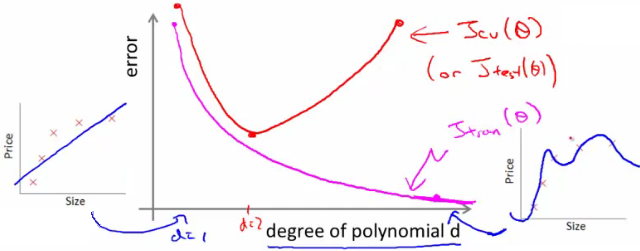

This plot can basically be viewed as error vs model complexity (x axis). As the model becomes more complex, it learns the training data more and more, descreasing the training error. However, as the complexity increase, overfitting begins to occur, through the introduction of more variance. That is why at first the test (cross validation) error decreases, because the model is becoming more accurate. However, as the complexity arises and overfitting comes into play, the new examples from the test data begin to suffer from more error (hence the U shape of the plot). 

We will talk more about this in the future- it is commonly known as the bias vs. variance trade off. 

Now lets get back to the problem at hand, and take a quick look at our X and y 

In [690]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
dtypes: float64(4)
memory usage: 15.7 KB


In [691]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
Yearly Amount Spent    500 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


In [693]:
X.shape

(500, 4)

In [694]:
y.shape

(500, 1)

We can see from outputs above that we are working with 500 training examples (remember: each one pertains to an individual user), 4 input features from X, and 1 output vector y. 

X is a (500x4) matrix, and y is a (500x1) vector containing the yearly amount spent by each user.

We are now going to split our training data into a training set and a test set. To do this we will use scikit learns model_selection and train_test_split method.

In [695]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

And now lets just take a quick look at our data now to get a better feel for what just happened.

In [696]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 202 to 351
Data columns (total 4 columns):
Avg. Session Length     350 non-null float64
Time on App             350 non-null float64
Time on Website         350 non-null float64
Length of Membership    350 non-null float64
dtypes: float64(4)
memory usage: 13.7 KB


In [697]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 18 to 259
Data columns (total 4 columns):
Avg. Session Length     150 non-null float64
Time on App             150 non-null float64
Time on Website         150 non-null float64
Length of Membership    150 non-null float64
dtypes: float64(4)
memory usage: 5.9 KB


We can see that from our original X (500 training examples), X_train now is made of 350 training examples, and X_test is made up of 150 examples. This was based on the test_size parameter that we set to 0.3. 

## Training the Model
It is finally time to train our model on the training data set! 

We can start by instantiating our linear regression model.

In [699]:
linearRegressionModel = linear_model.LinearRegression()

Now with the model instantiated we can train it on the training data set. This can be done using the fit method.

In [700]:
linearRegressionModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

And just like that our model was trainined! At this point we can access the coefficients, but before we do I think its important to ask yourself- how did that just happen?

In the same way that it did when we implemented it from scratch using gradient descent. Scikit learn provides an awesome API that allows us to quickly instantiate a model and train it using only a few commands, but under the hood gradient descent is still being performed in an effort to minimize the cost (error). So the theta values that were found were those that produced the least error across all training examples when compared to the model predicitons!

With that said, lets look at the coefficients of the model. 

In [701]:
print(linearRegressionModel.coef_)

[[ 25.98154972  38.59015875   0.19040528  61.27909654]]


And just to make this a bit easier to visually see, lets create a dataframe based off of these coefficients.

In [702]:
coefficientsDF = pd.DataFrame(np.transpose(linearRegressionModel.coef_), X_train.columns, columns=['Coefficients'])

In [703]:
coefficientsDF

Coefficients
Avg. Session Length      25.981550
Time on App              38.590159
Time on Website           0.190405
Length of Membership     61.279097

### What do these above values mean?
- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

This is incredibly important to remember. There is a lot going on here (especially if you are thinking about what is really going on under the hood) so I find it very useful to keep in mind that the parameters we were solving for, that make up our model, represent the above bullet point definitions.

So now that our model is trained/fit, lets make some predictions!

## Making Predictions with Test Data
This will allow us to evaluate its performance- by testing it against examples it has never seen before. 

We can start by using the predict function to do so.

In [704]:
predictions = linearRegressionModel.predict(X_test)

How many predictions should we expect to have? 150 since there should be one prediction per training example. Sure enough we have 150!

In [705]:
predictions.size

150

Now at this point lets think about what we have:
* We have a prediction for each test example
* and we have the **real** output (y_test) for each test example

We can compare them visually using a scatterplot. 

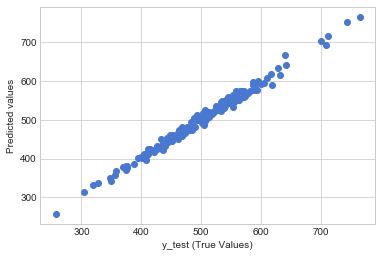

In [706]:
plt.scatter(y_test, predictions)
plt.xlabel('y_test (True Values)')
plt.ylabel('Predicted values')

We can see that our model is doing very well! If it was an absolutely perfect straight line off all the dots on top of eachother, it would mean we have a perfect model of all the test data. So, we do have a small bit of noise and error.

## Evaluating the Model
What is the best way to evaluate our model at this point? 

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them. Remember, **loss functions** are equivalent to **cost function**. This intuitively makes sense because the more we can minimize error, the more accurate our model is! These error terms basically tell us how far off our created model is from the real world. 

We can evaluate model performance by calculating the residual sum of squares and the explained variance score ($R^2$)

In [707]:
from sklearn import metrics

# grab the mean absolute error
MAE = metrics.mean_absolute_error(y_test, predictions)

# grab the mean squared error
MSE = metrics.mean_squared_error(y_test, predictions)

# grab the root mean squared error
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))

In [708]:
print(MAE)
print(MSE)
print(RMSE)

7.22814865343
79.813051651
8.93381506698


And now we can calculate $R^2$, which is essentially a measurement of how much variance your model explains. Here we explain 99% of the variance, which is a great fit. Remember, if you want to learn more about Linear Regression from a statistical perspective, check out my other notebooks. 

In [709]:
metrics.explained_variance_score(y_test, predictions)

0.98907712318896068

## Residuals
We ended up generating a model with a very good fit! Lets quickly explore our residuals to make sure that everything is okay with out data.

We can start by ploting a histogram of the residuals (difference between actual value and our predictions).

They do turn our to be normally distributed which is a great sign! 

#### Quick intuition: 
- If our residuals were mainly negative (and hence not normally distributed around 0) it means that our model often over estimates the actual amount a user spends in a year
- And if our residuals were mainly positive, it means our models generally is underestimating
- both of these things want to be avoided

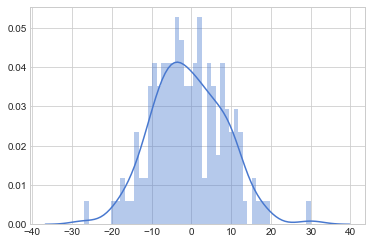

In [711]:
sns.distplot((y_test - predictions), bins=50)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

In [712]:
coefficientsDF

Coefficients
Avg. Session Length      25.981550
Time on App              38.590159
Time on Website           0.190405
Length of Membership     61.279097

Remember what each of these coefficients mean:
Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**Do you think the company should focus more on their mobile app or on their website?**


This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!


# Next Steps
And with that this intro to Linear Regression from a Machine Learning perspective is complete! To learn more check out my other notebooks, particularly the one regarding Linear Regression from a statistical perspective!

Thanks for following along!